In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

imdb_review_df = pd.read_csv('Data/IMDB Dataset.csv')
imdb_review_df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [3]:
imdb_review_df['sentiment'] = imdb_review_df['sentiment'].replace({'positive': 1, 'negative': 0}).astype(int)
imdb_review_df.head()

review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1

In [4]:
imdb_review_df

review  sentiment
0      One of the other reviewers has mentioned that ...          1
1      A wonderful little production. <br /><br />The...          1
2      I thought this was a wonderful way to spend ti...          1
3      Basically there's a family where a little boy ...          0
4      Petter Mattei's "Love in the Time of Money" is...          1
...                                                  ...        ...
49995  I thought this movie did a down right good job...          1
49996  Bad plot, bad dialogue, bad acting, idiotic di...          0
49997  I am a Catholic taught in parochial elementary...          0
49998  I'm going to have to disagree with the previou...          0
49999  No one expects the Star Trek movies to be high...          0

[50000 rows x 2 columns]

In [5]:
# Find the number of positive and negative reviews
print('Number of positive and negative reviews: ', imdb_review_df['sentiment'].value_counts())
# Find the proportion of positive and negative reviews
print('Proportion of positive and negative reviews: ', imdb_review_df['sentiment'].value_counts() / len(imdb_review_df))

Number of positive and negative reviews:  sentiment
1    25000
0    25000
Name: count, dtype: int64
Proportion of positive and negative reviews:  sentiment
1    0.5
0    0.5
Name: count, dtype: float64


In [6]:
length_reviews = imdb_review_df['review'].str.len()

# How long is the longest review?
print(f"There are {len(length_reviews)} reviews in the dataframe.")
print(f"The longest review is {max(length_reviews)} characters long.")

There are 50000 reviews in the dataframe.
The longest review is 13704 characters long.


In [7]:
from textblob import TextBlob

def get_sentiment(review):
    sentiment = TextBlob(review).sentiment
    return sentiment

imdb_review_polarity = imdb_review_df['review'].apply(get_sentiment)
imdb_review_polarity.head()

0    (0.023433179723502305, 0.4903686635944701)
1      (0.1097222222222222, 0.5593434343434344)
2     (0.35400793650793644, 0.6587301587301588)
3             (-0.0578125, 0.45416666666666666)
4     (0.2179522497704316, 0.45291551882460973)
Name: review, dtype: object

In [8]:
print(f"Sentiment of first review: {imdb_review_polarity[0]}")
print(f"Sentiment of second review: {imdb_review_polarity[1]}")
print(f"Sentiment of last review: {imdb_review_polarity.iloc[-1]}")

Sentiment of first review: Sentiment(polarity=0.023433179723502305, subjectivity=0.4903686635944701)
Sentiment of second review: Sentiment(polarity=0.1097222222222222, subjectivity=0.5593434343434344)
Sentiment of last review: Sentiment(polarity=0.12000000000000001, subjectivity=0.6376923076923077)


In [9]:
longest_review = max(imdb_review_df['review'], key=len)
print(longest_review)
print('\n')
longest_review_blob = TextBlob(longest_review)
print(f"Sentiment of the longest film review: {longest_review_blob.sentiment}.")

Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bubba through the table, but

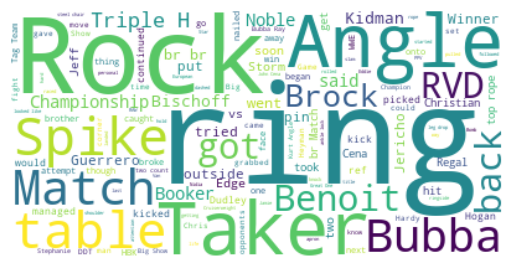

In [10]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

longest_review_wc = WordCloud(
    background_color='white', 
    stopwords=set(stopwords.words('english'))
    ).generate(longest_review)

plt.imshow(longest_review_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

vectorizer.fit([imdb_review_df['review'][0]])
first_review_bow = vectorizer.transform([imdb_review_df['review'][0]])
print(first_review_bow.toarray())

[[ 1  1  1  1  1  1  1  6  1  2  1  1  4  1  2  2  1  1  1  6  1  2  1  1
   1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  2  1  1  1
   1  1  1  1  1  2  1  5  3  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1
   1  2  1  1  1  3  1  2  1  1  1  9  6  1  2  2  1  1  1  1  3  1  1  1
   1  1  1  1  4  1  1  1  2  1  1  1  1  1  1  3  7  3  1  3  1  1  2  1
   6  1  1  1  1  3  1  1  1  1  1  1  2  1  1  2  1  1  1  1  1  1  1  3
   1  1  1  3  1  1  1  1  2  1  1  4  1 16  1  1  1  3  1  6  1  1  1  1
   1  1  1  4  3  1  2  1  2  2  1  2  5  2  1  1  3  1]]


In [12]:
reviews_vect = CountVectorizer(
    max_features=200000, 
    ngram_range=(1,2), 
    max_df=500, min_df=25, 
    stop_words='english',
    token_pattern=r'\b[^\d\W][^\d\W]+\b'
    )

reviews_vect.fit(imdb_review_df['review'])
X_reviews = reviews_vect.transform(imdb_review_df['review'])

X_count_df = pd.DataFrame(X_reviews.toarray(), columns=reviews_vect.get_feature_names_out())
print(X_count_df.head())

   aamir  aaron  abandon  abandoned  abandoning  abandonment  abandons  abbey  \
0      0      0        0          0           0            0         0      0   
1      0      0        0          0           0            0         0      0   
2      0      0        0          0           0            0         0      0   
3      0      0        0          0           0            0         0      0   
4      0      0        0          0           0            0         0      0   

   abbot  abbott  ...  zombie movies  zombies  zombies br  zone  zoo  zoom  \
0      0       0  ...              0        0           0     0    0     0   
1      0       0  ...              0        0           0     0    0     0   
2      0       0  ...              0        0           0     0    0     0   
3      0       0  ...              0        0           0     0    0     0   
4      0       0  ...              0        0           0     0    0     0   

   zooms  zorro  zucco  zucker  
0      0   

In [13]:
print('Length of vectorizer: ', reviews_vect.get_feature_names_out())

Length of vectorizer:  ['aamir' 'aaron' 'abandon' ... 'zorro' 'zucco' 'zucker']


In [14]:
from nltk import word_tokenize

print(word_tokenize(imdb_review_df['review'][0]))

['One', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', '1', 'Oz', 'episode', 'you', "'ll", 'be', 'hooked', '.', 'They', 'are', 'right', ',', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'The', 'first', 'thing', 'that', 'struck', 'me', 'about', 'Oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence', ',', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'GO', '.', 'Trust', 'me', ',', 'this', 'is', 'not', 'a', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', '.', 'This', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs', ',', 'sex', 'or', 'violence', '.', 'Its', 'is', 'hardcore', ',', 'in', 'the', 'classic', 'use', 'of', 'the', 'word.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'It', 'is', 'called', 'OZ', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'Oswald', 'Maximum', 'Security', 'State', 'Penitentary', '.', 

In [31]:
reviews_tokens = [word_tokenize(review.lower()) for review in imdb_review_df['review']]
print(reviews_tokens[1])

['a', 'wonderful', 'little', 'production', '.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'the', 'filming', 'technique', 'is', 'very', 'unassuming-', 'very', 'old-time-bbc', 'fashion', 'and', 'gives', 'a', 'comforting', ',', 'and', 'sometimes', 'discomforting', ',', 'sense', 'of', 'realism', 'to', 'the', 'entire', 'piece', '.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'the', 'actors', 'are', 'extremely', 'well', 'chosen-', 'michael', 'sheen', 'not', 'only', '``', 'has', 'got', 'all', 'the', 'polari', "''", 'but', 'he', 'has', 'all', 'the', 'voices', 'down', 'pat', 'too', '!', 'you', 'can', 'truly', 'see', 'the', 'seamless', 'editing', 'guided', 'by', 'the', 'references', 'to', 'williams', "'", 'diary', 'entries', ',', 'not', 'only', 'is', 'it', 'well', 'worth', 'the', 'watching', 'but', 'it', 'is', 'a', 'terrificly', 'written', 'and', 'performed', 'piece', '.', 'a', 'masterful', 'production', 'about', 'one', 'of', 'the', 'great', 'master', "'s", 'of', 'comedy', 'and', 'his', 'life', '

In [37]:
cleaned_tokens = [
    [word for word in review if (word.replace('-', '').isalpha() and word != 'br') or '-' in word] 
    for review in reviews_tokens
]
print(cleaned_tokens[1])

['a', 'wonderful', 'little', 'production', 'the', 'filming', 'technique', 'is', 'very', 'unassuming-', 'very', 'old-time-bbc', 'fashion', 'and', 'gives', 'a', 'comforting', 'and', 'sometimes', 'discomforting', 'sense', 'of', 'realism', 'to', 'the', 'entire', 'piece', 'the', 'actors', 'are', 'extremely', 'well', 'chosen-', 'michael', 'sheen', 'not', 'only', 'has', 'got', 'all', 'the', 'polari', 'but', 'he', 'has', 'all', 'the', 'voices', 'down', 'pat', 'too', 'you', 'can', 'truly', 'see', 'the', 'seamless', 'editing', 'guided', 'by', 'the', 'references', 'to', 'williams', 'diary', 'entries', 'not', 'only', 'is', 'it', 'well', 'worth', 'the', 'watching', 'but', 'it', 'is', 'a', 'terrificly', 'written', 'and', 'performed', 'piece', 'a', 'masterful', 'production', 'about', 'one', 'of', 'the', 'great', 'master', 'of', 'comedy', 'and', 'his', 'life', 'the', 'realism', 'really', 'comes', 'home', 'with', 'the', 'little', 'things', 'the', 'fantasy', 'of', 'the', 'guard', 'which', 'rather', 'tha

In [17]:
"""
english_stopwords = set(stopwords.words('english'))

reviews_wc = WordCloud(background_color='white', stopwords=english_stopwords).generate(all_reviews_text)
plt.imshow(reviews_wc, interpolation='bilinear')
plt.axis('off')
plt.show()"""

"""# Create a concatenated string of all reviews
all_reviews_text = ' '.join(imdb_review_df['review'])

# Tokenize the concatenated text
tokenized_reviews = word_tokenize(all_reviews_text)

# Print the tokenized reviews
print(tokenized_reviews)"""

"""from nltk.stem import WordNetLemmatizer
WNLemmatizer = WordNetLemmatizer()
lem_tokens = [WNLemmatizer.lemmatize(token) for sublist in cleaned_tokens for token in sublist]"""

'from nltk.stem import WordNetLemmatizer\nWNLemmatizer = WordNetLemmatizer()\nlem_tokens = [WNLemmatizer.lemmatize(token) for sublist in cleaned_tokens for token in sublist]'

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_model = TfidfVectorizer(
    max_features=200000, 
    ngram_range=(1,2), 
    max_df=500, min_df=25, 
    stop_words='english',
    token_pattern=r'\b[^\d\W][^\d\W]+\b'
)

reviews_tfidf = tfidf_model.fit_transform(imdb_review_df['review'])

X_tfidf = pd.DataFrame(reviews_tfidf.toarray(), columns=tfidf_model.get_feature_names_out())
print(X_tfidf.head())

   aamir  aaron  abandon  abandoned  abandoning  abandonment  abandons  abbey  \
0    0.0    0.0      0.0        0.0         0.0          0.0       0.0    0.0   
1    0.0    0.0      0.0        0.0         0.0          0.0       0.0    0.0   
2    0.0    0.0      0.0        0.0         0.0          0.0       0.0    0.0   
3    0.0    0.0      0.0        0.0         0.0          0.0       0.0    0.0   
4    0.0    0.0      0.0        0.0         0.0          0.0       0.0    0.0   

   abbot  abbott  ...  zombie movies  zombies  zombies br  zone  zoo  zoom  \
0    0.0     0.0  ...            0.0      0.0         0.0   0.0  0.0   0.0   
1    0.0     0.0  ...            0.0      0.0         0.0   0.0  0.0   0.0   
2    0.0     0.0  ...            0.0      0.0         0.0   0.0  0.0   0.0   
3    0.0     0.0  ...            0.0      0.0         0.0   0.0  0.0   0.0   
4    0.0     0.0  ...            0.0      0.0         0.0   0.0  0.0   0.0   

   zooms  zorro  zucco  zucker  
0    0.0   

In [19]:
print('Top 5 rows using BOW: \n', X_count_df.head(5))
print('Top 5 rows using TF-IDF: \n', X_tfidf.head(5))

Top 5 rows using BOW: 
    aamir  aaron  abandon  abandoned  abandoning  abandonment  abandons  abbey  \
0      0      0        0          0           0            0         0      0   
1      0      0        0          0           0            0         0      0   
2      0      0        0          0           0            0         0      0   
3      0      0        0          0           0            0         0      0   
4      0      0        0          0           0            0         0      0   

   abbot  abbott  ...  zombie movies  zombies  zombies br  zone  zoo  zoom  \
0      0       0  ...              0        0           0     0    0     0   
1      0       0  ...              0        0           0     0    0     0   
2      0       0  ...              0        0           0     0    0     0   
3      0       0  ...              0        0           0     0    0     0   
4      0       0  ...              0        0           0     0    0     0   

   zooms  zorro  zuc

In [20]:
# Split data into training and testing sets - DONE
# Logistic Regression - DONE
# Naive Bayes
# Support Vector Machines
# Random Forest
# Gradient Boosting Machines
# NLP tasks for topic modelling and NER

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(
    imdb_review_df['review'], 
    imdb_review_df['sentiment'], 
    test_size=0.2, 
    random_state=42)

# Creating the Count X_train and X_test
X_train_counts = reviews_vect.fit_transform(X_train)
X_test_counts = reviews_vect.transform(X_test)

# Creating the TF-IDF X_train and X_test
X_train_tfidf = tfidf_model.fit_transform(X_train)
X_test_tfidf = tfidf_model.transform(X_test)

In [22]:
lr_model = LogisticRegression()
lr_model.fit(X_train_counts, y_train)

/Users/benjaminlucas/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [24]:
y_pred_counts = lr_model.predict(X_test_counts)
print("Counts Accuracy: ", accuracy_score(y_test, y_pred_counts))
print('\n')
counts_cm = confusion_matrix(y_test, y_pred_counts)
print(counts_cm)

Counts Accuracy:  0.866


[[4248  713]
 [ 627 4412]]


In [25]:
y_pred_tfidf = lr_model.predict(X_test_tfidf)
print("TF-IDF Accuracy: ", accuracy_score(y_test, y_pred_tfidf))
print('\n')
tfidf_cm = confusion_matrix(y_test, y_pred_tfidf)
print(tfidf_cm)

TF-IDF Accuracy:  0.8714


[[4238  723]
 [ 563 4476]]


In [26]:
print("Counts Classification Report: \n", classification_report(y_test, y_pred_counts))
print('\n')
print("TF-IDF Classification Report: \n", classification_report(y_test, y_pred_tfidf))

Counts Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      4961
           1       0.86      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



TF-IDF Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      4961
           1       0.86      0.89      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [27]:
print('Counts AUC Score:', roc_auc_score(y_test, y_pred_counts))
print('TF-IDF AUC Score:', roc_auc_score(y_test, y_pred_tfidf))

Counts AUC Score: 0.8659247628625725
TF-IDF AUC Score: 0.8712673679066635


In [28]:
# Predict Proba ?
# Rerun LR models with (C=1000) and (C=0.01) for both Counts and TF-IDF ?

In [39]:
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.corpora.dictionary import Dictionary
from gensim.models import TfidfModel
from gensim.parsing.preprocessing import preprocess_string, strip_tags, strip_punctuation, strip_multiple_whitespaces, strip_numeric, remove_stopwords, stem_text

imdb_review_df.head()

review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1

In [41]:
# I already have reviews_tokens and cleaned_tokens in previous code.
gensim_review_dict = Dictionary(cleaned_tokens)
gensim_review_dict.token2id

{'a': 0,
 'about': 1,
 'accustomed': 2,
 'after': 3,
 'agenda': 4,
 'agreements': 5,
 'all': 6,
 'an': 7,
 'and': 8,
 'appeal': 9,
 'are': 10,
 'around': 11,
 'aryans': 12,
 'as': 13,
 'audiences': 14,
 'away': 15,
 'be': 16,
 'become': 17,
 'being': 18,
 'bitches': 19,
 'brutality': 20,
 'but': 21,
 'called': 22,
 'can': 23,
 'cells': 24,
 'charm': 25,
 'christians': 26,
 'city': 27,
 'class': 28,
 'classic': 29,
 'comfortable': 30,
 'could': 31,
 'crooked': 32,
 'dare': 33,
 'darker': 34,
 'dealings': 35,
 'death': 36,
 'developed': 37,
 'dodgy': 38,
 'does': 39,
 'drugs': 40,
 'due': 41,
 'em': 42,
 'emerald': 43,
 'episode': 44,
 'ever': 45,
 'exactly': 46,
 'experience': 47,
 'experimental': 48,
 'face': 49,
 'fact': 50,
 'faint': 51,
 'far': 52,
 'first': 53,
 'focuses': 54,
 'for': 55,
 'forget': 56,
 'from': 57,
 'fronts': 58,
 'gangstas': 59,
 'get': 60,
 'given': 61,
 'glass': 62,
 'go': 63,
 'goes': 64,
 'got': 65,
 'graphic': 66,
 'guards': 67,
 'happened': 68,
 'hardcore':

In [45]:
gensim_review_corpus = [gensim_review_dict.doc2bow(review) for review in cleaned_tokens]
gensim_review_corpus

[[(0, 3),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 6),
  (9, 1),
  (10, 2),
  (11, 1),
  (12, 1),
  (13, 4),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 2),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 2),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 2),
  (42, 1),
  (43, 1),
  (44, 2),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 2),
  (54, 1),
  (55, 5),
  (56, 3),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 2),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 2),
  (74, 1),
  (75, 1),
  (76, 6),
  (77, 1),
  (78, 3),
  (79, 1),
  (80, 2),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 9),
  (85, 6),
  (86, 1),
  (87, 2),
  (88, 2),
  (89, 1),
  (90, 1),
  (91, 1)

In [46]:
from collections import defaultdict
import itertools

total_word_count = defaultdict(int)

for review in gensim_review_corpus:
    for word_id, word_count in review:
        total_word_count[word_id] += word_count

for word_id, count in total_word_count.items():
    print(f'{gensim_review_dict[word_id]}: {count}')

a: 321254
about: 33972
accustomed: 57
after: 14826
agenda: 158
agreements: 7
all: 45562
an: 42885
and: 323076
appeal: 809
are: 59984
around: 7019
aryans: 12
as: 91549
audiences: 903
away: 5332
be: 52801
become: 2929
being: 13058
bitches: 19
brutality: 136
but: 83182
called: 2600
can: 23999
cells: 95
charm: 735
christians: 150
city: 2267
class: 1429
classic: 3448
comfortable: 226
could: 18518
crooked: 95
dare: 304
darker: 205
dealings: 39
death: 3748
developed: 703
dodgy: 90
does: 20360
drugs: 710
due: 1776
em: 69
emerald: 13
episode: 3098
ever: 11701
exactly: 1961
experience: 2087
experimental: 168
face: 2990
fact: 6840
faint: 78
far: 5757
first: 17200
focuses: 352
for: 86928
forget: 1434
from: 40399
fronts: 41
gangstas: 4
get: 18264
given: 3555
glass: 304
go: 9679
goes: 4735
got: 7212
graphic: 461
guards: 155
happened: 2008
hardcore: 219
has: 33649
have: 56694
hearted: 131
high: 3813
home: 3534
hooked: 274
i: 173690
if: 33826
in: 185215
injustice: 82
inmates: 99
into: 17811
inwards: 2

In [54]:
gensim_tfidf = TfidfModel(gensim_review_corpus)
tfidf_review_one = gensim_tfidf[gensim_review_corpus[0]] # tfidf weights for first review

sorted_tfidf_review_one = sorted(
    tfidf_review_one, 
    key=lambda w: w[1], 
    reverse=True
)

for word_id, weight in sorted_tfidf_review_one:
    print(f"{gensim_review_dict[word_id]}: {weight}")

oz: 0.4615074860415379
violence: 0.1843352047982928
prison: 0.17859194869849795
inmates: 0.17507634868130667
forget: 0.1466584526893579
struck: 0.14199595105563909
inwards: 0.13660974868960632
penitentary: 0.13660974868960632
scuffles: 0.13660974868960632
gangstas: 0.1272590908874079
agreements: 0.11970979128632668
aryans: 0.11790843308520949
nickel: 0.11790843308520949
emerald: 0.11243864891384771
bitches: 0.10696886474248594
oswald: 0.1030879911116493
privacy: 0.1030879911116493
latinos: 0.10253729637860029
unflinching: 0.0996354121084631
dealings: 0.09724859073329759
fronts: 0.09653841899624363
nickname: 0.0943114687914739
timid: 0.0943114687914739
muslims: 0.09291949821051095
due: 0.09224988454672789
accustomed: 0.09165781787973142
mannered: 0.09165781787973142
city: 0.09145413955692837
em: 0.09028475430626469
stares: 0.08964730591320161
episode: 0.08892049350407102
shady: 0.08864757842752603
italians: 0.08845622560726106
faint: 0.08736183003034394
injustice: 0.08667863859756396
do

In [57]:
imdb_review_df['review'].iloc[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:

def preprocess(text):
    # Modify or extend the preprocessing steps here
    custom_filters = [
        lambda x: x.lower(), # lowercase
        strip_tags,          # remove html tags
        strip_punctuation,   # replace punctuation with space
        strip_multiple_whitespaces, # remove repeating whitespaces
        strip_numeric,       # remove numbers
        remove_stopwords,    # remove stopwords
        stem_text            # apply stemming
    ]
    return preprocess_string(text, custom_filters)

reviews_gensim = imdb_review_df['review'].apply(preprocess)
dictionary = corpora.Dictionary(reviews_gensim)
corpus = [dictionary.doc2bow(text) for text in reviews_gensim]
gensim = TfidfModel(corpus)
gensim_corpus = [gensim[doc] for doc in corpus]

reviews_gensim = gensim_model.fit_transform(imdb_review_df['review'])

X_gensim = pd.DataFrame(reviews_gensim.toarray(), columns=gensim_model.get_feature_names_out())
print(X_gensim.head())